<a href="https://colab.research.google.com/github/dhsingh0815/ML/blob/main/Classifier/GiniIndex_DummyPastHiresDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pydotplus

In [2]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from math import log2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/PastHires.csv')

In [5]:
df.head(5)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [6]:
df.isnull().sum()


,0
Years Experience,0
Employed?,0
Previous employers,0
Level of Education,0
Top-tier school,0
Interned,0
Hired,0


In [7]:
num = df.select_dtypes(exclude=['object']).columns.tolist()
print(num)

['Years Experience', 'Previous employers']


In [8]:
df.head(5)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [9]:
num = df.select_dtypes(exclude=['object']).columns.tolist()
print(num)

['Years Experience', 'Previous employers']


In [10]:
d ={'Y' :1 , 'N':0}
df['Hired']=df['Hired'].map(d)
df['Employed?']=df['Employed?'].map(d)
df['Top-tier school']=df['Top-tier school'].map(d)
df['Interned']=df['Interned'].map(d)
d ={'BS' :0 , 'MS':1, 'PhD':2}
df['Level of Education']=df['Level of Education'].map(d)

In [11]:
df.head(5)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [12]:
df.describe()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,5.153846,0.384615,1.769231,0.769231,0.461538,0.384615,0.692308
std,6.348834,0.506370,2.006400,0.926809,0.518875,0.506370,0.480384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,7.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,20.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000


In [13]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [14]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


<Axes: >

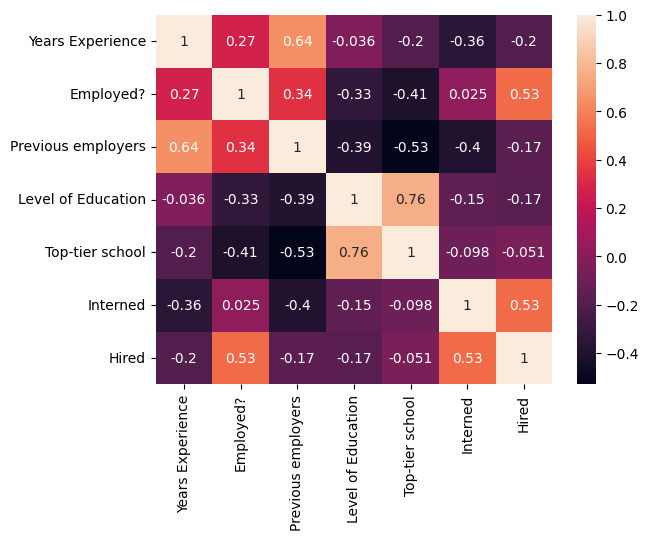

In [15]:
num = df.select_dtypes(exclude=['object']).columns.tolist()
corr =df[num].corr()
sns.heatmap(corr, annot=True)

In [16]:
import pandas as pd
import math

# function to calculate entropy
def gini_index(column):
  counts = column.value_counts()
  propabilities = counts/ len(column)
  return 1-sum(propabilities * propabilities)



# calculate Gini Index for each feature
for feature in features:
  ig = gini_index(df[feature])
  print(f"Gini Index for {feature}: {ig}")

Gini Index for Years Experience: 0.8520710059171597
Gini Index for Employed?: 0.47337278106508873
Gini Index for Previous employers: 0.7692307692307692
Gini Index for Level of Education: 0.591715976331361
Gini Index for Top-tier school: 0.4970414201183432
Gini Index for Interned: 0.47337278106508873


In [17]:
import numpy as np

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [21]:
y= df['Hired']
X = df[features]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model =DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)
model

DecisionTreeClassifier()

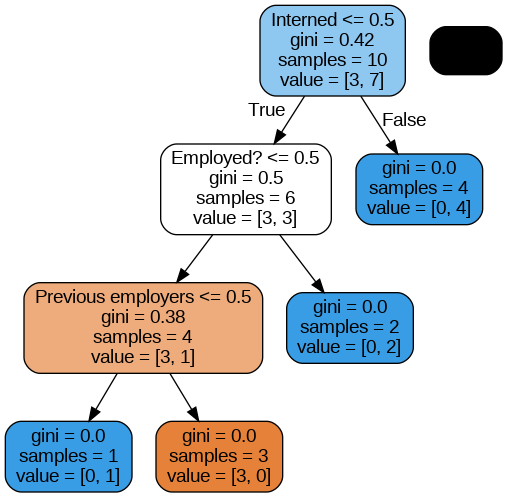

In [25]:
dot_data = export_graphviz(model , feature_names=X_train.columns, rounded=True, proportion=False, precision=2, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())